<a href="https://colab.research.google.com/github/reginafeles/ml_hw/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ssh-keygen -t rsa -b 4096 -C "kate2002elisey@gmail.com"

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
/root/.ssh/id_rsa already exists.
Overwrite (y/n)? y
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:IMffxHtgVGaQsHs+uwwEiPuQ9t+CHHy5f/95BjxLHCc kate2002elisey@gmail.com
The key's randomart image is:
+---[RSA 4096]----+
|        ..o++    |
|   . o   +.o     |
|  . o = . =      |
|   o o + = o  E .|
|  =.   .S + .o + |
| . +o o. o .  *  |
|   .o+ .. o  . + |
|    o.o. o.o  ..o|
|      .oo.+o..oo |
+----[SHA256]-----+


In [6]:
%cd ~/.ssh

/root/.ssh


In [7]:
!touch config
!touch known_hosts

### Домашнее задание 1

**Titanic challenge** - самое известное соревнование по Data Science

Используйте данные о пассажирах Титаника, чтобы построить свой классификатор, который предсказывает вероятность гибели пассажира на печально известном корабле

#### Шаг 1: импорт библиотек

Заполните плейсхолдеры

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Шаг 2: загружаем данные с Титаника

In [ ]:
# выгрузим датасет напрямую с URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Шаг 3: анализ данных

Опишите данные и укажите в комментариях к коду ответы на вопросы:

1. выведите df.info()
  - в каких столбцах есть NaN'ы?
  - ориентируясь на количество NaN'ов в столбцах, определите, какие строки "не жалко" выбросить, а какие лучше сохранить
2. визуализируйте распределение классов по столбцу `Survived`
  - сбалансировали ли классы в нашем датасете?
3. выведите список столбцов, в которых представлены категориальные данные
  - почему категориальные данные нужно будет обработать перед запуском обучения модели?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.select_dtypes(include=['object', 'category']).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
for column in df.columns:
  print(column, len(df[column].unique()))

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 4




---


```Name``` ```Ticket``` ```Cabin``` - много уникальных значений, нет смысла переводить в число - дропнем


```Sex``` - male/female - переведем в 0 и 1
```Embarked``` - оставляем, 4 значения переведем в числа

**Вывод**
```PassengerId``` ```Name``` ```Ticket``` ```Cabin``` - не нужны, дропаем;
```Age``` ```Embarked```- дозаполним;
```Sex``` - энкод








---







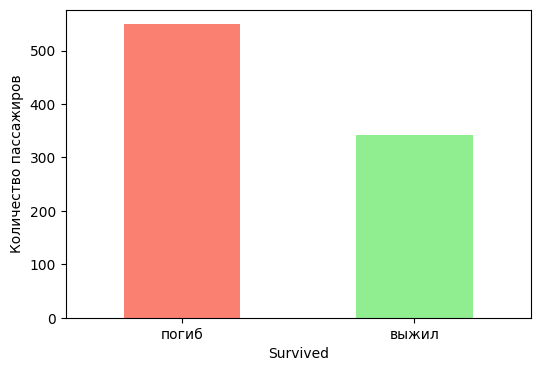

In [ ]:
plt.figure(figsize=(6, 4))
df['Survived'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'])
plt.xlabel('Survived')
plt.ylabel('Количество пассажиров')
plt.xticks([0, 1], ['погиб', 'выжил'], rotation=0)
plt.show()

#### Шаг 4: анализ данных

Ответы на эти вопросы помогут вам принять решения для препроцессинга данных:

- требуется ли балансировка классов?
- какие столбцы нужно дропнуть?
- какие данные нужно преобразовать к виду числовых?

**Дропаем столбцы**

Оставим классы в покое и сразу перейдем к очистке таблицы

Есть два пути:

- дропнуть "лишние" столбцы из исходной таблицы
- создать новую таблицу, в которую мы занесем только "нужные" столбцы

Выберите любой способ и создайте новый датафрейм, очищенный от неинформативных столбцов, в которых много NaN'ов

In [ ]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Categorical --> Numerical**

Для преобразования категориальных данных к виду чисел, в sklearn используется метод `LabelEncoder`

- документация [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

Метод автоматически заменяет категориальные метки на целые числа

In [ ]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True


Рассмотрим еще один метод: мы имитируем one-hot encoding с помощью метода `get_dummies` из Pandas

- [документация метода](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

Принцип работы one-hot-encoding:

- как мы закодируем цифры 1 и 9, чтобы получить разреженный массив?
- создаем матрицу из двух векторов размерностью 10
  ```
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] # цифра 1
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] # цифра 9
  ```
- единица означает позицию цифры в ряде `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`
- также:
  - единица означает `True` (число находится в этой позиции)
  - ноль означает `False` (число не находится в этой позиции)

При использовании этого метода в датафреймах, мы также создаем три новых столбца (три новых вектора), в которых помечаем `True` соответствие данной метке

In [ ]:
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df['Embarked'] = df['Embarked'].fillna('S')
df = df.drop('Embarked', axis=1)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True


Теперь обновите ваш датафрейм: замените с использованием изученных методов категориальные данные на числовые

Изучите документацию и найдите дополнительные материалы, ответьте на вопрос: чем `LabelEncoder` отличается от `get_dummies` и когда какой метод лучше использовать?

In [ ]:
df['Embarked_C'] = LabelEncoder().fit_transform(df['Embarked_C'])
df['Embarked_Q'] = LabelEncoder().fit_transform(df['Embarked_Q'])
df['Embarked_S'] = LabelEncoder().fit_transform(df['Embarked_S'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


**Заполняем пропуски**

Мы убрали лишние столбцы, но NaN'ы по-прежнему есть в нашем датафрейме

Рассмотрим метод `SimpleImputer` из sklearn для заполнения пропусков в данных

- [документация SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [ ]:
# заполняем пропуски в столбце Age
imputer = SimpleImputer(strategy="mean")
df['Age'] = imputer.fit_transform(df[['Age']])

Изучите документацию sklearn и ответьте на вопросы: какие стратегии доступы для работы с методом SimpleImputer? Чем они отличаются? Какие стратегии подойдут для работы с категориальными данными?

**Feature Engineering**

> Данные - это пища для вашей модели

Слишком шумные данные вызовут отравление модели (кстати, один из методов киберпреступности, построенный на работе с данными, так и называется - data poisoning!)

Недостаточность в данных может стать причиной недообучения (underfitting), поэтому мы можем не только дропать, но и добавлять фичи, т.е. признаки, на которых будет учиться наша модель

Этот процесс называется **feature engineering**

In [ ]:
# Добавим фичу Family size = SibSp + Parch + 1 (единица обозначает самого пассажира)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Фича Alone для тех, кто путешествует один
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,1,22.0,1,0,7.2500,0,0,1,2,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,2,0
2,1,3,0,26.0,0,0,7.9250,0,0,1,1,1
3,1,1,0,35.0,1,0,53.1000,0,0,1,2,0
4,0,3,1,35.0,0,0,8.0500,0,0,1,1,1


Добавьте любую новую фичу в датафрейм, которая легко выводится из данных

Например, можно вытащить обращения к пассажирам из столбца `Name` из исходной таблицы: `Mr., Mrs., Dr.`

Для этого изучите внимательно данные, познакомьтесь с описанием датасета на Kaggle

- https://www.kaggle.com/c/titanic/

Вам нужно самостоятельно решить, что можно извлечь из этих данных, как назвать новую фичу и избавиться от категориальных меток

In [ ]:
age_1 = df[df['Pclass'] == 1]['Age'].median()
age_2 = df[df['Pclass'] == 2]['Age'].median()
age_3 = df[df['Pclass'] == 3]['Age'].median()
age_1, age_2, age_3

(37.0, 29.0, 24.0)

In [ ]:
def fill_age(row):
   if pd.isnull(row['Age']):
       if row['Pclass'] == 1:
           return age_1
       if row['Pclass'] == 2:
           return age_2
       return age_3
   return row['Age']

In [ ]:
df['Age'] = df.apply(fill_age, axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,1,22.0,1,0,7.2500,0,0,1,2,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,2,0
2,1,3,0,26.0,0,0,7.9250,0,0,1,1,1
3,1,1,0,35.0,1,0,53.1000,0,0,1,2,0
4,0,3,1,35.0,0,0,8.0500,0,0,1,1,1


Границы цены билетов по классам

In [ ]:
max_fare = df['Fare'].max()
min_fare = df['Fare'].min()
med_fare = df['Fare'].median()
max_fare, min_fare, med_fare

(512.3292, 0.0, 14.4542)

In [ ]:
print(df[df['Pclass'] == 1].shape[0])
print(df[df['Pclass'] == 2].shape[0])
print(df[df['Pclass'] == 3].shape[0])

216
184
491


Попробуем найти нижние и верхние границы цен билетов

In [ ]:
print(df[df['Fare'] >= 175].shape[0])
print(df[(df['Fare'] >= 14) & (df['Fare'] <= 175)].shape[0])
print(df[df['Fare'] < 14].shape[0])

20
435
436


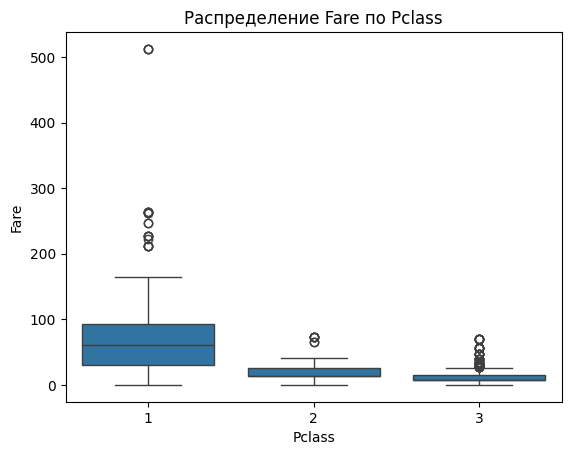

In [ ]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Распределение Fare по Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

По графику: для дорогих билетов -> от 200 и выше - выбросы, значит берем от 50; для средней цены -> от 25 до 50; для дешевых -> от 0 до 25


In [ ]:
print(df[df['Fare'] >= 50].shape[0])
print(df[(df['Fare'] >= 25) & (df['Fare'] < 50)].shape[0])
print(df[df['Fare'] < 25].shape[0])

161
173
557


Новый признак: ```FClass``` - класс билета


*   0 - низкая стоимость
*   1 - средняя стоимость
*   2 - высокая стоимость







In [ ]:
df['FareCategory'] = pd.cut(df['Fare'], bins=[0, 25, 50, float('inf')], labels=[0, 1, 2], right=False)
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,FareCategory
0,0,3,1,22.0,1,0,7.2500,0,0,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,2,0,2
2,1,3,0,26.0,0,0,7.9250,0,0,1,1,1,0
3,1,1,0,35.0,1,0,53.1000,0,0,1,2,0,2
4,0,3,1,35.0,0,0,8.0500,0,0,1,1,1,0
5,0,3,1,24.0,0,0,8.4583,0,1,0,1,1,0
6,0,1,1,54.0,0,0,51.8625,0,0,1,1,1,2
7,0,3,1,2.0,3,1,21.0750,0,0,1,5,0,0
8,1,3,0,27.0,0,2,11.1333,0,0,1,3,0,0
9,1,2,0,14.0,1,0,30.0708,1,0,0,2,0,1




---


Добавим бинарный признак ```IsMajor```, который отвечает за возраст пассажиров


*   0 - несовершеннолетний
*   1 - совершеннолетний


In [ ]:
df['IsMajor'] = df['Age'].apply(lambda x: 1 if x >= 18 else 0)
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,FareCategory,IsMajor
0,0,3,1,22.0,1,0,7.2500,0,0,1,2,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0,2,0,2,1
2,1,3,0,26.0,0,0,7.9250,0,0,1,1,1,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1,2,0,2,1
4,0,3,1,35.0,0,0,8.0500,0,0,1,1,1,0,1
5,0,3,1,24.0,0,0,8.4583,0,1,0,1,1,0,1
6,0,1,1,54.0,0,0,51.8625,0,0,1,1,1,2,1
7,0,3,1,2.0,3,1,21.0750,0,0,1,5,0,0,0
8,1,3,0,27.0,0,2,11.1333,0,0,1,3,0,0,1
9,1,2,0,14.0,1,0,30.0708,1,0,0,2,0,1,0


#### Шаг 4: обучение

Создаем пары `data - label`

In [ ]:
X = df.drop(columns=['Survived']) # данные = все столбцы кроме метки Survived
y = df['Survived'] # метки = только столбец Survived

Вспомните прошлое занятие: примените метод `train_test_split`

Создайте 2 выборки данных в соотношении 80 на 20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Изучите информацию о том, как работает логистическая регрессия и ответьте на вопрос: какую роль играет `StandardScaler` в работе с логистической регрессией?

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучение, как и в случае работы с линейной регрессией, займет всего пару строк

Опишите основной принцип работы логистической регрессии своими словами (2-3 предложения достаточно)

Предварительно изучите материал: https://web.stanford.edu/~jurafsky/slp3/5.pdf

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# предсказания
y_pred_log = log_reg.predict(X_test_scaled)

# вывод репорта
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Performance:
Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Повторим магию и обучим наивные байесовский классификатор. Что значит `Gaussian` в названии метода `GaussianNB`? Изучите документацию метода, чтобы ответить на этот вопрос

Почему для этого метода не нужен StandardScaler?

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naïve Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naïve Bayes Performance:
Accuracy: 0.776536312849162
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       105
           1       0.72      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)


y_pred_knn = classifier.predict(X_test)
print("KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

KNN Performance:
Accuracy: 0.776536312849162
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       105
           1       0.72      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



Мы молодцы! Отрисуем результат с помощью матрицы ошибок

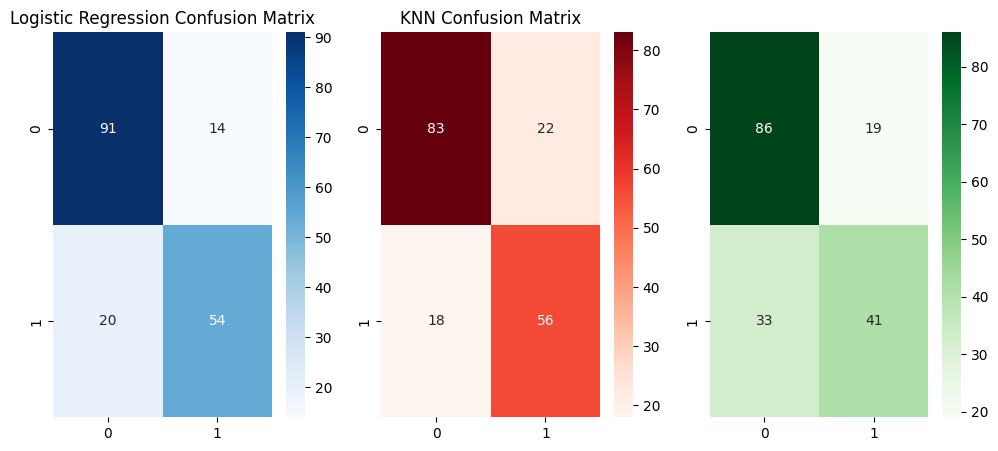

In [ ]:
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Reds", ax=axes[1])
axes[1].set_title("Naïve Bayes Confusion Matrix")

sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Greens", ax=axes[2])
axes[1].set_title("KNN Confusion Matrix")

plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Сделаем предсказания
y_pred = gb_model.predict(X_test)

# Оценим точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Построим матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.8101


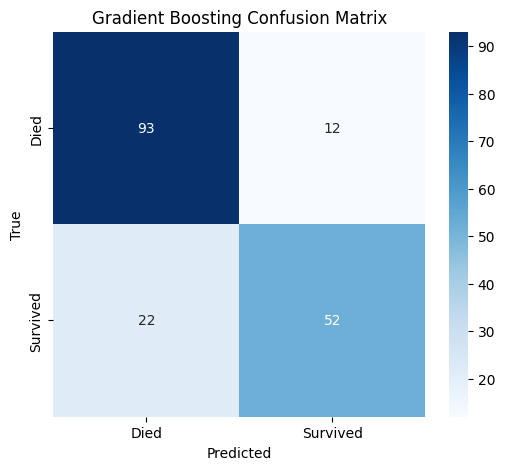

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"])
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Параметры для поиска
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Создание модели градиентного бустинга
gb_model = GradientBoostingClassifier(random_state=42)

# Поиск по сетке с кросс-валидацией
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8101


In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.14294934, 0.36945748, 0.67362971, 0.24093642, 0.52578211,
        0.41916881, 0.20258112, 0.42859817, 0.83008451, 0.08152828,
        0.16197453, 0.24300256, 0.14264789, 0.28264112, 0.42780313,
        0.2228291 , 0.59706397, 0.7395906 , 0.08424249, 0.15977168,
        0.24045339, 0.13513083, 0.27783022, 0.4184176 , 0.3400753 ,
        0.56952415, 0.73701081]),
 'std_fit_time': array([0.0110276 , 0.11097749, 0.09955518, 0.01048082, 0.21503614,
        0.00929926, 0.01430813, 0.01948775, 0.16569501, 0.00213953,
        0.00452997, 0.00857925, 0.00437175, 0.00915051, 0.01795915,
        0.00448539, 0.11492736, 0.07394334, 0.00613174, 0.00463424,
        0.00371814, 0.00256609, 0.00539021, 0.01121705, 0.05566204,
        0.11205827, 0.03478677]),
 'mean_score_time': array([0.00556917, 0.00529737, 0.00772405, 0.00512967, 0.0074738 ,
        0.0042819 , 0.00333877, 0.00383224, 0.00486431, 0.00296588,
        0.00315585, 0.00379272, 0.0032732 , 0.00355463, 0.004174

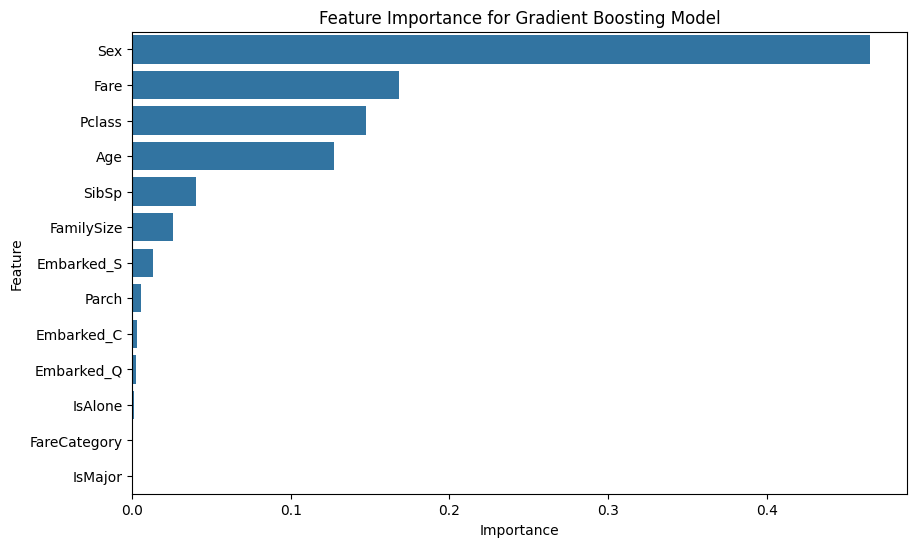

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

# Предположим, что мы уже обучили модель градиентного бустинга
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Получаем важность признаков
importances = gb_model.feature_importances_

# Создаем DataFrame с важностью признаков
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Сортируем по убыванию важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Gradient Boosting Model')
plt.show()

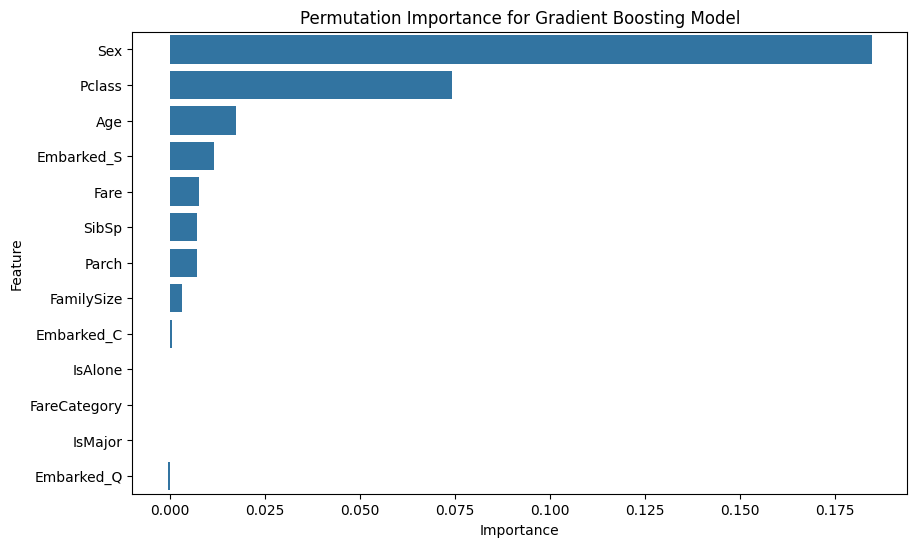

In [ ]:
from sklearn.inspection import permutation_importance

# Получаем важность признаков с помощью permutation importance
result = permutation_importance(gb_model, X_test, y_test, n_repeats=10, random_state=42)

# Создаем DataFrame для визуализации
perm_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
})

# Сортируем по убыванию важности
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Importance for Gradient Boosting Model')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Преобразуем категориальный столбец 'FareCategory' в числовой
label_encoder = LabelEncoder()
df['FareCategory'] = label_encoder.fit_transform(df['FareCategory'])

# Проверим типы данных
print(df.dtypes)

Survived          int64
Pclass            int64
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked_C        int64
Embarked_Q        int64
Embarked_S        int64
FamilySize        int64
IsAlone           int64
FareCategory      int64
IsMajor           int64
dtype: object


In [ ]:
import xgboost as xgb


dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Устанавливаем параметры для XGBoost
params = {
    'objective': 'binary:logistic',  # Бинарная классификация
    'eval_metric': 'logloss',  # Логарифмическая потеря
}

# Обучаем модель
model = xgb.train(params, dtrain, num_boost_round=100)

# Получаем предсказания на тестовых данных
y_pred_xgb = model.predict(dtest)

# Преобразуем вероятности в бинарные метки
y_pred_xgb_binary = (y_pred_xgb > 0.5).astype(int)

# Оценим точность модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_binary)
print(f'Accuracy: {accuracy_xgb:.4f}')

Accuracy: 0.8156
